In [268]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [269]:
#Load train data from csv file
train = pd.read_csv('titanic_train.csv')

In [270]:
#Check first 5 indexes
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [271]:
#Check info about data
# Data missing from age, cabin and embarked!
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [272]:
#Check statistics of data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Eploratory Data Analysis

In this section, it is done a exploratory analysis to visualize some details of the dataset.
We want to check:
1)Visualize how many nulls values 
2)Proportion of man/woman
3)Number of survivors and the proportion of man/woman
4)Which class they were from
5)Age relation and proportion
6)Number family members onboard

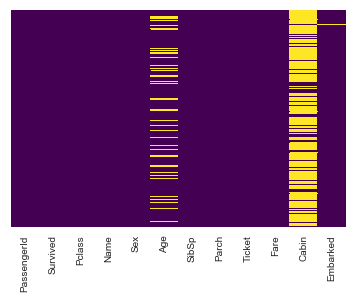

In [273]:
# Checking missing data in a heatmap 
sns.heatmap(train.isnull(), yticklabels = False, cbar =False,  cmap = 'viridis')

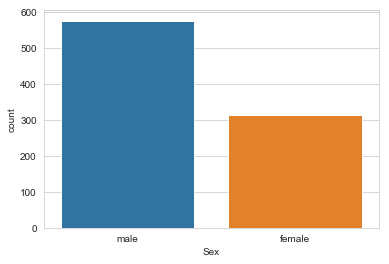

In [274]:
sns.countplot(x='Sex',  data = train)

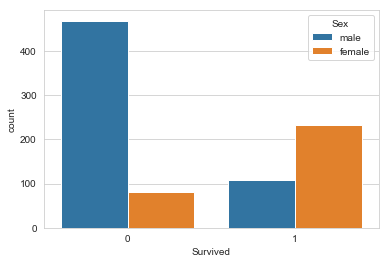

In [275]:
sns.set_style('whitegrid')
sns.countplot(x ='Survived', hue = 'Sex', data = train)

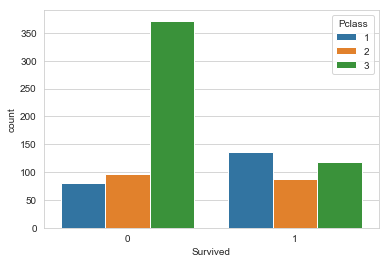

In [276]:
sns.countplot(x='Survived', hue='Pclass',data = train)

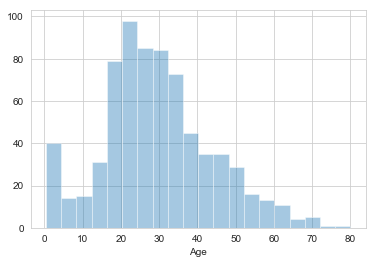

In [277]:
sns.distplot(train['Age'].dropna(), kde = False, bins = 20)

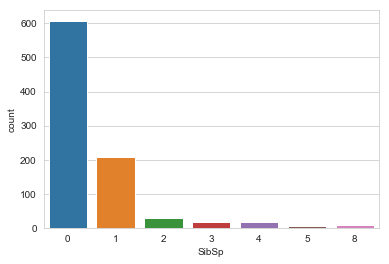

In [278]:
sns.countplot(x = 'SibSp',data = train)

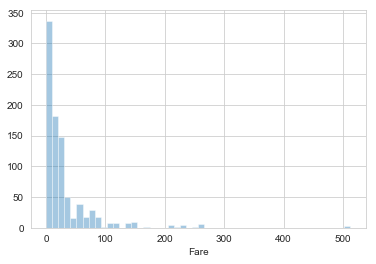

In [279]:
sns.distplot(train['Fare'], kde =False, bins= 50)

## Clean Data 

In  this section, the data are cleaned. Check the average of age in each class to be used as impute variable for missing age data. Some other features were remove, like, name and ticket. The Sex and Embarked were transformed into categorical data as dummies. 

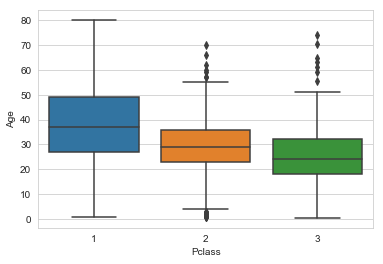

In [280]:
sns.boxplot(x ='Pclass',y = 'Age',data  = train)

In [281]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
    else:
        return Age

In [282]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis = 1)

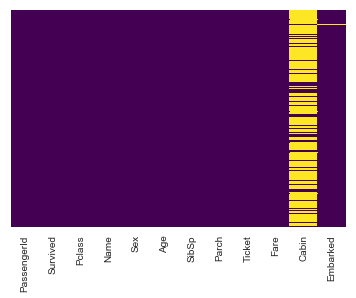

In [283]:
sns.heatmap(train.isnull(), yticklabels= False, cbar= False, cmap = 'viridis')

In [284]:
train.drop('Cabin', axis = 1, inplace = True)

In [285]:
train.dropna(inplace = True)

In [286]:
sex = pd.get_dummies(train['Sex'], drop_first = True)

In [287]:
embarked = pd.get_dummies(train['Embarked'],drop_first = True)

In [288]:
train = pd.concat([train, sex, embarked], axis = 1)

In [289]:
train.drop(['PassengerId','Sex','Embarked','Name','Ticket'], axis = 1, inplace = True)

In [291]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Cleaning Test data

In [403]:
test = pd.read_csv('titanic_test.csv')

In [404]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [405]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


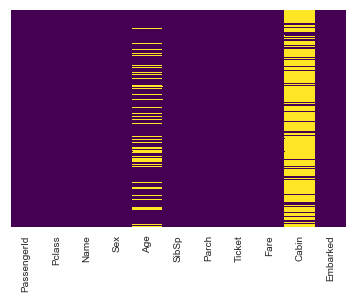

In [406]:
sns.heatmap(test.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [407]:
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis = 1)

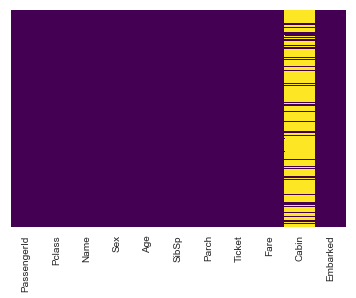

In [408]:
sns.heatmap(test.isnull(), yticklabels = False, cbar= False, cmap= 'viridis')

In [409]:
test.drop('Cabin', axis = 1, inplace = True)

In [410]:
sex_test = pd.get_dummies(test['Sex'], drop_first = True)
embarked_test = pd.get_dummies(test['Embarked'], drop_first = True)
test = pd.concat([test,sex_test,embarked_test], axis =1)


In [411]:
test.dropna(inplace = True)

In [412]:
PassengerId_test = test['PassengerId']

In [413]:
test.drop(['PassengerId', 'Name','Sex','Embarked','Ticket'], axis =1, inplace = True)

In [414]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


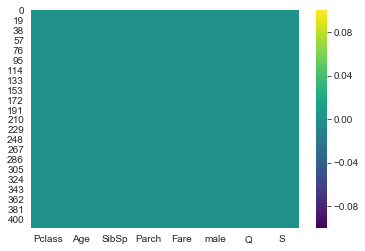

In [415]:
sns.heatmap(test.isnull(), cmap= 'viridis')

## Train Model

At the end, was used a logistic regression model, just to practice it. ;D

In [293]:
X_train = train.drop('Survived', axis = 1)
y_train = train['Survived']

In [294]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [295]:
logmodel = LogisticRegression(solver = 'liblinear')

In [302]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [393]:
yhat = logmodel.predict(test)

In [418]:
yhat = pd.Series(yhat, index = PassengerId_test)

In [ ]:
#Report if y_test available during split of trainig data 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [141]:
# print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [142]:
# confusion_matrix(y_test, yhat)

array([[148,  15],
       [ 36,  68]], dtype=int64)